In [ ]:
import json
import requests
from typing import List, Tuple

def download_jsonl(url: str) -> List[dict]:
    """Download and parse JSONL file from given URL."""
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to download file: {response.status_code}")
    
    # Split into lines and parse each JSON object
    data = []
    for line in response.text.strip().split('\n'):
        if line:  # Skip empty lines
            data.append(json.loads(line))
    return data

def extract_image_caption_pairs(data: List[dict]) -> List[Tuple[str, str]]:
    """Extract image_id and caption pairs from the dataset."""
    pairs = []
    for item in data:
        image_id = item['image_id']
        caption = item['caption']
        pairs.append((image_id, caption))
    return pairs

def main():
    # URL for the Flickr30k test annotations
    url = "https://storage.googleapis.com/localized-narratives/annotations/flickr30k_test_localized_narratives.jsonl"
    
    try:
        # Download and parse the JSONL file
        print("Downloading and parsing JSONL file...")
        data = download_jsonl(url)
        
        # Extract image-caption pairs
        pairs = extract_image_caption_pairs(data)
        
        # Print some statistics and examples
        print(f"\nTotal number of image-caption pairs: {len(pairs)}")
        print("\nFirst 3 image-caption pairs:")
        for image_id, caption in pairs[:3]:
            print(f"\nImage ID: {image_id}")
            print(f"Caption: {caption[:100]}...")
            
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

Loading the LocalizedNarratives dataset...


/nfs/stak/users/shressag/hpc-share/anaconda3/envs/h100_stylegan/lib/python3.10/site-packages/datasets/load.py:1486: FutureWarning: The repository for HuggingFaceM4/LocalizedNarratives contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/HuggingFaceM4/LocalizedNarratives
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset structure: dict_keys(['train', 'validation', 'test'])

Displaying image-caption examples:


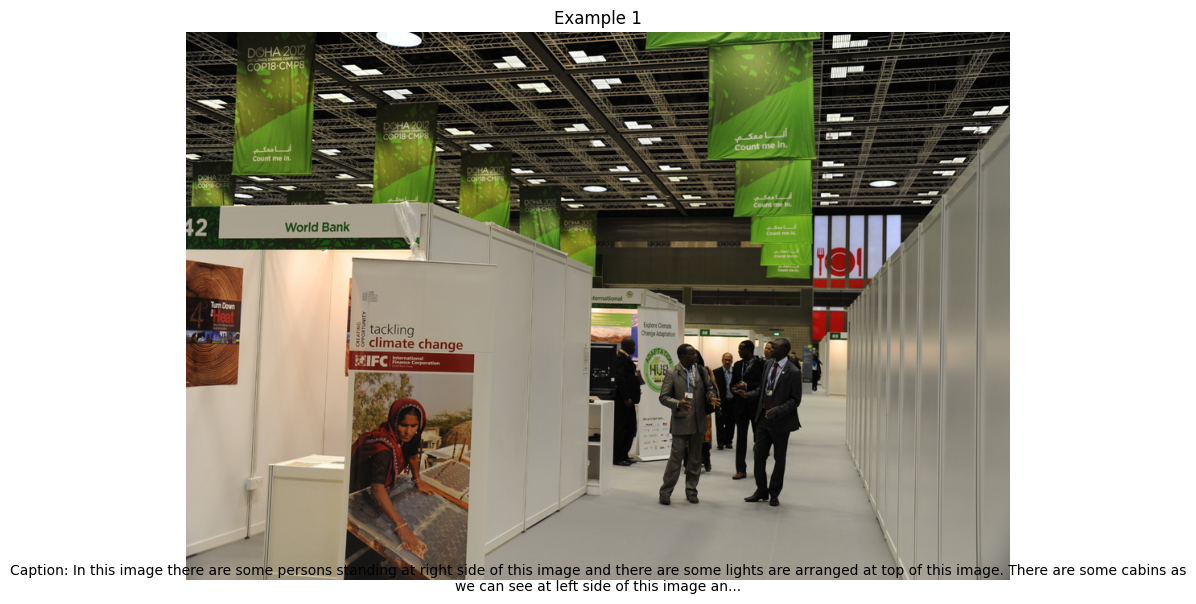

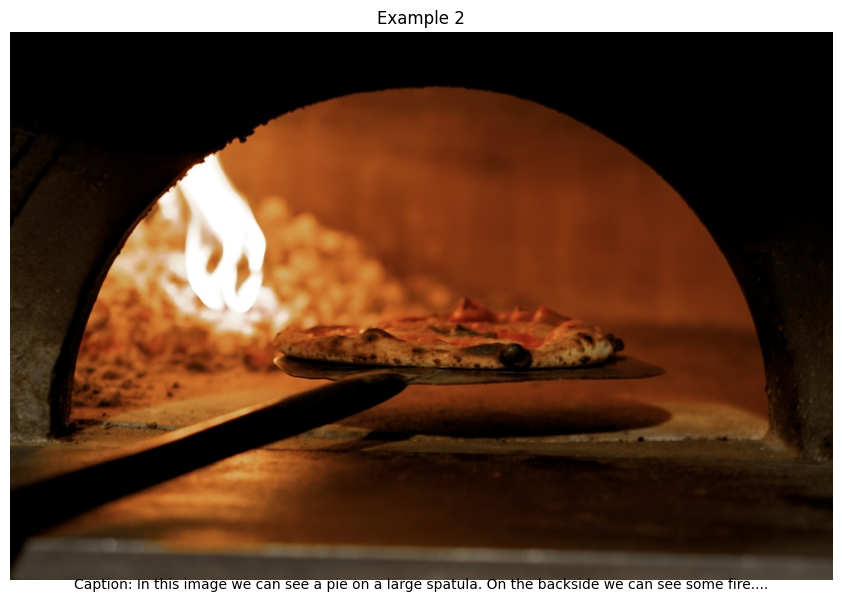

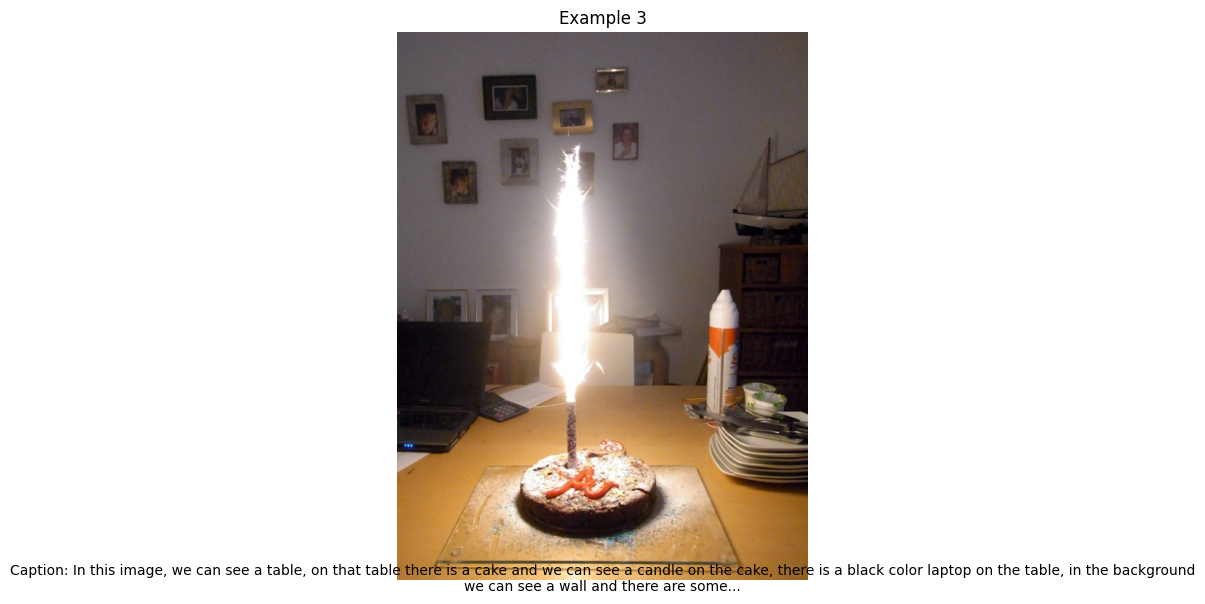

In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import io
import requests

def display_image_caption_examples(dataset, num_examples=3):
    """
    Display image-caption examples from the LocalizedNarratives dataset.
    
    Args:
        dataset: The dataset to display examples from
        num_examples: Number of examples to display
    """
    for i, example in enumerate(dataset.take(num_examples)):
        # Get the image URL and caption
        image_url = example['image_url']
        caption = example['caption']
        
        # Download the image
        response = requests.get(image_url)
        if response.status_code == 200:
            # Open the image from the response content
            image = Image.open(io.BytesIO(response.content))
            
            # Create a figure with two subplots
            plt.figure(figsize=(12, 6))
            
            # Display the image
            plt.subplot(1, 1, 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Example {i+1}")
            
            # Display the caption below the image
            plt.figtext(0.5, 0.01, f"Caption: {caption[:200]}...", 
                       wrap=True, horizontalalignment='center', fontsize=10)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"Failed to download image for example {i+1}")
            print(f"Caption: {caption[:200]}...")

# Load the LocalizedNarratives dataset in streaming mode
print("Loading the LocalizedNarratives dataset...")
dataset = load_dataset("HuggingFaceM4/LocalizedNarratives", streaming=True)

# Display information about the dataset
print(f"Dataset structure: {dataset.keys()}")

# Get the training split
train_dataset = dataset['train']

# Display some examples
print("\nDisplaying image-caption examples:")
display_image_caption_examples(train_dataset)
